Loading Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

Loading train and test dataset

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

Printing first 5 rows of the train dataset.

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Below is a brief information about each columns of the dataset:

1. **PassengerId:** An unique index for passenger rows. It starts from 1 for first row and increments by 1 for every new rows.

2. **Survived:** Shows if the passenger survived or not. 1 stands for survived and 0 stands for not survived.

3. **Pclass:** Ticket class. 1 stands for First class ticket. 2 stands for Second class ticket. 3 stands for Third class ticket.

4. **Name:** Passenger's name. Name also contain title. "Mr" for man. "Mrs" for woman. "Miss" for girl. "Master" for boy.

5. **Sex:** Passenger's sex. It's either Male or Female.

6. **Age:** Passenger's age. "NaN" values in this column indicates that the age of that particular passenger has not been recorded.

7. **SibSp:** Number of siblings or spouses travelling with each passenger.
8. **Parch:** Number of parents of children travelling with each passenger.
9. **Ticket:** Ticket number.
10. **Fare:** How much money the passenger has paid for the travel journey.
11. **Cabin:** Cabin number of the passenger. "NaN" values in this column indicates that the cabin number of that particular passenger has not been recorded.
12. **Embarked:** Port from where the particular passenger was embarked/boarded.

**Total rows and columns**

We can see that there are 891 rows and 12 columns in our training dataset.

In [4]:
train.shape

(891, 12)

*describe()* method can show different values like count, mean, standard deviation, etc. of numeric data types.

In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


*describe(include = ['O'])* will show the descriptive statistics of object data types.

In [6]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Taussig, Miss. Ruth",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


This shows that there are duplicate *Ticket number* and *Cabins* shared. The highest number of duplicate ticket number is "CA. 2343". It has been repeated 7 times. Similarly, the highest number of people using the same cabin is 4. They are using cabin number "C23 C25 C27".

We also see that 644 people were embarked from port "S".

Among 891 rows, 577 were Male and the rest were Female.

We use *info()* method to see more information of our train dataset.

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


We can see that *Age* value is missing for many rows. 

Out of 891 rows, the *Age* value is present only in 714 rows.

Similarly, *Cabin* values are also missing in many rows. Only 204 out of 891 rows have *Cabin* values.

In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are 177 rows with missing *Age*, 687 rows with missing *Cabin* and 2 rows with missing *Embarked* information.

Test data has 418 rows and 11 columns.

> Train data rows = 891
>
> Test data rows = 418
>
> Total rows = 891+418 = 1309

We can see that around 2/3 of total data is set as Train data and around 1/3 of total data is set as Test data.

In [9]:
test.shape

(418, 11)

*Survived* column is not present in Test data.
We have to train our classifier using the Train data and generate predictions (*Survived*) on Test data.

In [10]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


There are missing entries for *Age* in Test dataset as well.

Out of 418 rows in Test dataset, only 332 rows have *Age* value.

*Cabin* values are also missing in many rows. Only 91 rows out ot 418 have values for *Cabin* column.

In [12]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

There are 86 rows with missing *Age*, 327 rows with missing *Cabin* and 1 row with missing *Fare* information.

In this section, we analyze relationship between different features with respect to *Survival*. We see how different feature values show different survival chance. We also plot different kinds of diagrams to **visualize** our data and findings.

In [13]:
survived = train[train['Survived'] == 1]
not_survived = train[train['Survived'] == 0]

print ("Survived: %i (%.1f%%)"%(len(survived), float(len(survived))/len(train)*100.0))
print ("Not Survived: %i (%.1f%%)"%(len(not_survived), float(len(not_survived))/len(train)*100.0))
print ("Total: %i"%len(train))

Survived: 342 (38.4%)
Not Survived: 549 (61.6%)
Total: 891


Higher class passengers have better survival chance.

In [14]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [15]:
train.groupby('Pclass').Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [16]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


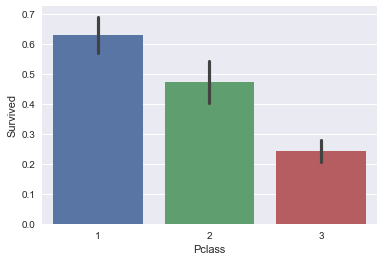

In [17]:
#train.groupby('Pclass').Survived.mean().plot(kind='bar')
sns.barplot(x='Pclass', y='Survived', data=train)

Sex vs. Survival

Females have better survival chance.

In [18]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [19]:
train.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [20]:
train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


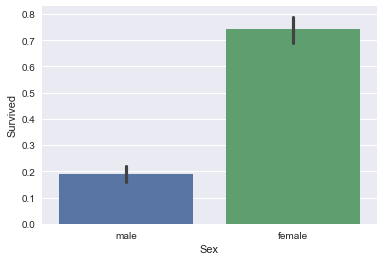

In [21]:
#train.groupby('Sex').Survived.mean().plot(kind='bar')
sns.barplot(x='Sex', y='Survived', data=train)

Below, we just find out how many males and females are there in each *Pclass*. We then plot a stacked bar diagram with that information. We found that there are more males among the 3rd Pclass passengers.

Sex     female  male
Pclass              
1           94   122
2           76   108
3          144   347


Text(0,0.5,'Percentage')

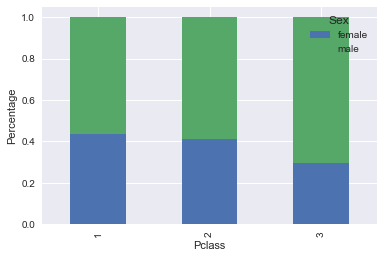

In [22]:
tab = pd.crosstab(train['Pclass'], train['Sex'])
print (tab)

tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Pclass')
plt.ylabel('Percentage')

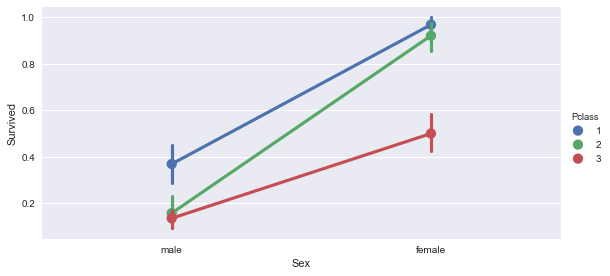

In [23]:
sns.factorplot('Sex', 'Survived', hue='Pclass', size=4, aspect=2, data=train)

From the above plot, it can be seen that:
- Women from 1st and 2nd Pclass have almost 100% survival chance. 
- Men from 2nd and 3rd Pclass have only around 10% survival chance.

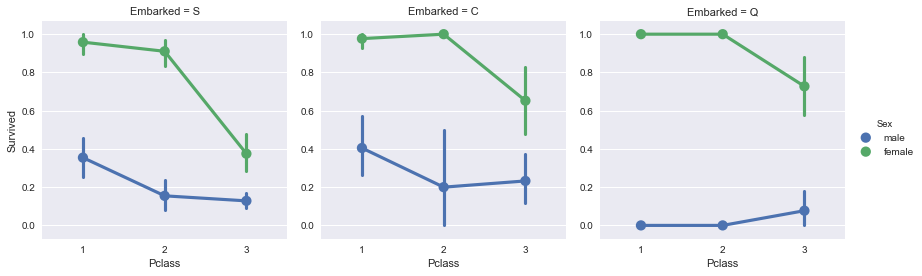

In [24]:
sns.factorplot(x='Pclass', y='Survived', hue='Sex', col='Embarked', data=train)

From the above plot, it can be seen that:
- Almost all females from Pclass 1 and 2 survived.
- Females dying were mostly from 3rd Pclass.
- Males from Pclass 1 only have slightly higher survival chance than Pclass 2 and 3.

Embarked vs. Survived

In [25]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [26]:
train.groupby('Embarked').Survived.value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

In [27]:
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


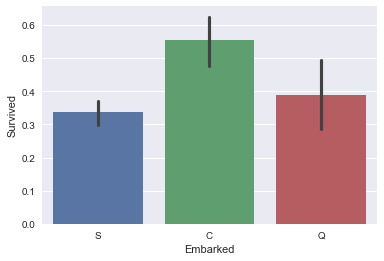

In [28]:
#train.groupby('Embarked').Survived.mean().plot(kind='bar')
sns.barplot(x='Embarked', y='Survived', data=train)

In [29]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [30]:
train.groupby('Parch').Survived.value_counts()

Parch  Survived
0      0           445
       1           233
1      1            65
       0            53
2      0            40
       1            40
3      1             3
       0             2
4      0             4
5      0             4
       1             1
6      0             1
Name: Survived, dtype: int64

In [31]:
train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


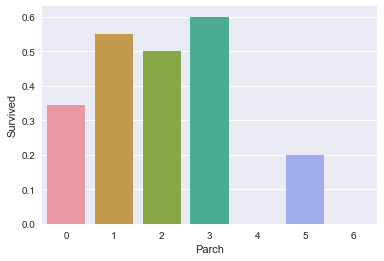

In [32]:
#train.groupby('Parch').Survived.mean().plot(kind='bar')
sns.barplot(x='Parch', y='Survived', ci=None, data=train) # ci=None will hide the error bar

SibSp vs. Survival

In [33]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [34]:
train.groupby('SibSp').Survived.value_counts()

SibSp  Survived
0      0           398
       1           210
1      1           112
       0            97
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Survived, dtype: int64

In [35]:
train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


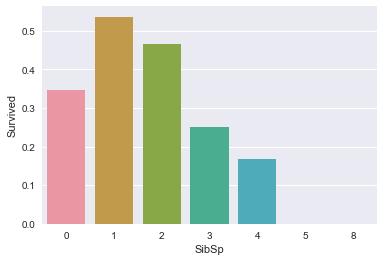

In [36]:
#train.groupby('SibSp').Survived.mean().plot(kind='bar')
sns.barplot(x='SibSp', y='Survived', ci=None, data=train) # ci=None will hide the error bar

Age vs. Survival

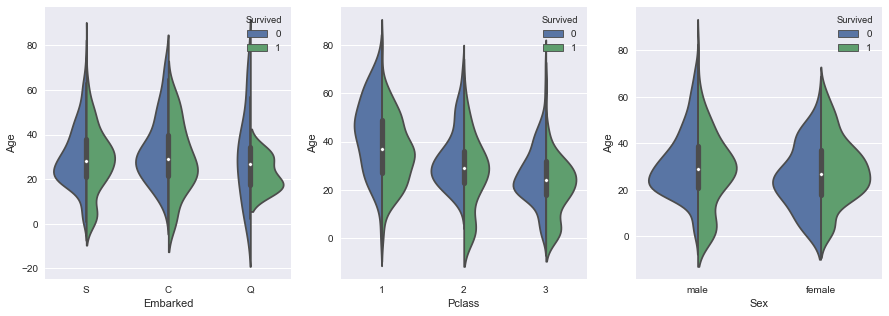

In [37]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

sns.violinplot(x="Embarked", y="Age", hue="Survived", data=train, split=True, ax=ax1)
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=train, split=True, ax=ax2)
sns.violinplot(x="Sex", y="Age", hue="Survived", data=train, split=True, ax=ax3)

From *Pclass* violinplot, we can see that:
- 1st Pclass has very few children as compared to other two classes.
- 1st Plcass has more old people as compared to other two classes.
- Almost all children (between age 0 to 10) of 2nd Pclass survived.
- Most children of 3rd Pclass survived.
- Younger people of 1st Pclass survived as compared to its older people.

From *Sex* violinplot, we can see that:
- Most male children (between age 0 to 14) survived.
- Females with age between 18 to 40 have better survival chance.

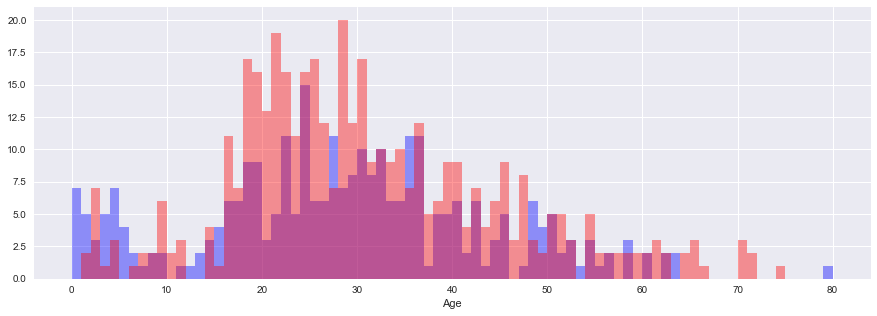

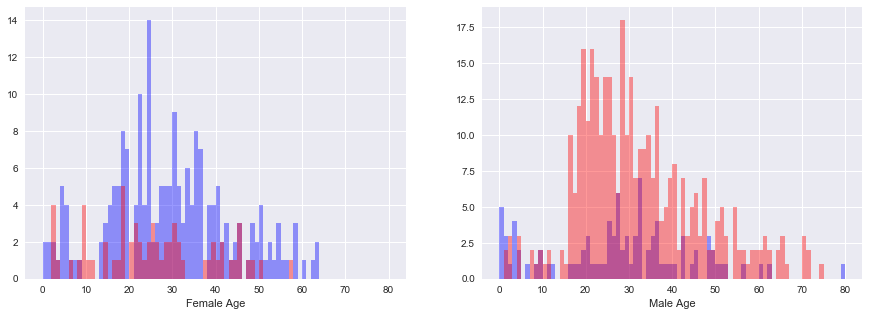

In [38]:
total_survived = train[train['Survived']==1]
total_not_survived = train[train['Survived']==0]
male_survived = train[(train['Survived']==1) & (train['Sex']=="male")]
female_survived = train[(train['Survived']==1) & (train['Sex']=="female")]
male_not_survived = train[(train['Survived']==0) & (train['Sex']=="male")]
female_not_survived = train[(train['Survived']==0) & (train['Sex']=="female")]

plt.figure(figsize=[15,5])
plt.subplot(111)
sns.distplot(total_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='blue')
sns.distplot(total_not_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='red', axlabel='Age')

plt.figure(figsize=[15,5])

plt.subplot(121)
sns.distplot(female_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='blue')
sns.distplot(female_not_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='red', axlabel='Female Age')

plt.subplot(122)
sns.distplot(male_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='blue')
sns.distplot(male_not_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='red', axlabel='Male Age')


From the above figures, we can see that:
- Combining both male and female, we can see that children with age between 0 to 5 have better chance of survival.
- Females with age between "18 to 40" and "50 and above" have higher chance of survival.
- Males with age between 0 to 14 have better chance of survival.

Correlating Features

Heatmap of Correlation between different features:

>Positive numbers = Positive correlation, i.e. increase in one feature will increase the other feature & vice-versa.
>
>Negative numbers = Negative correlation, i.e. increase in one feature will decrease the other feature & vice-versa.

In our case, we focus on which features have strong positive or negative correlation with the *Survived* feature.

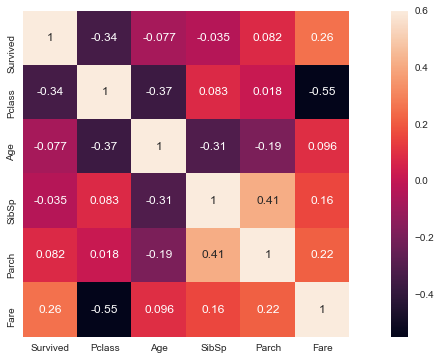

In [39]:
plt.figure(figsize=(15,6))
sns.heatmap(train.drop('PassengerId',axis=1).corr(), vmax=0.6, square=True, annot=True)

Feature Extraction

In this section, we select the appropriate features to train our classifier. Here, we create new features based on existing features. We also convert categorical features into numeric form.

Name Feature

Let's first extract titles from *Name* column.

In [40]:
train_test_data = [train, test] # combining train and test dataset

for dataset in train_test_data:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.')

C:\Users\mohse\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  after removing the cwd from sys.path.


In [41]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


As you can see above, we have added a new column named *Title* in the Train dataset with the *Title* present in the particular passenger name.

In [42]:
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


The number of passengers with each *Title* is shown above.

We now replace some less common titles with the name "Other".

In [43]:
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', \
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Other,0.347826


After that, we convert the categorical *Title* values into numeric form.

In [44]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Other": 5}
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

In [45]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


Sex Feature

We convert the categorical value of *Sex* into numeric. We represent 0 as female and 1 as male.

In [46]:
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [47]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1


Embarked Feature

There are empty values for some rows for *Embarked* column. The empty values are represented as "nan" in below list.

In [48]:
train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

Let's check the number of passengers for each *Embarked* category.

In [49]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

We find that category "S" has maximum passengers. Hence, we replace "nan" values with "S".

In [50]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('C')

In [51]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1


We now convert the categorical value of *Embarked* into numeric. We represent 0 as S, 1 as C and 2 as Q.

In [52]:
for dataset in train_test_data:
    #print(dataset.Embarked.unique())
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [53]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,1


Age Feature

We first fill the NULL values of *Age* with a random number between (mean_age - std_age) and (mean_age + std_age). 

We then create a new column named *AgeBand*. This categorizes age into 5 different age range.

In [54]:
for dataset in train_test_data:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)
    
train['AgeBand'] = pd.cut(train['Age'], 5)

print (train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean())

         AgeBand  Survived
0  (-0.08, 16.0]  0.535088
1   (16.0, 32.0]  0.353604
2   (32.0, 48.0]  0.367589
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909


C:\Users\mohse\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [55]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,0,1,"(16.0, 32.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,1,3,"(32.0, 48.0]"
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,0,2,"(16.0, 32.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,0,3,"(32.0, 48.0]"
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,0,1,"(32.0, 48.0]"


Now, we map *Age* according to *AgeBand*.

In [56]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4

In [57]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,NaN,0,1,"(16.0, 32.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,71.2833,C85,1,3,"(32.0, 48.0]"
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,7.9250,NaN,0,2,"(16.0, 32.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,C123,0,3,"(32.0, 48.0]"
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,NaN,0,1,"(32.0, 48.0]"


Fare Feature

Replace missing *Fare* values with the median of *Fare*.

In [58]:
for dataset in train_test_data:
    dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())

Create *FareBand*. We divide the *Fare* into 4 category range.

In [59]:
train['FareBand'] = pd.qcut(train['Fare'], 4)
print (train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean())

          FareBand  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081


In [60]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,NaN,0,1,"(16.0, 32.0]","(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,71.2833,C85,1,3,"(32.0, 48.0]","(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,7.9250,NaN,0,2,"(16.0, 32.0]","(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,C123,0,3,"(32.0, 48.0]","(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,NaN,0,1,"(32.0, 48.0]","(7.91, 14.454]"


Map *Fare* according to *FareBand*

In [61]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

In [62]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,0,NaN,0,1,"(16.0, 32.0]","(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,3,C85,1,3,"(32.0, 48.0]","(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,1,NaN,0,2,"(16.0, 32.0]","(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,3,C123,0,3,"(32.0, 48.0]","(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,1,NaN,0,1,"(32.0, 48.0]","(7.91, 14.454]"


### SibSp & Parch Feature

Combining *SibSp* & *Parch* feature, we create a new feature named *FamilySize*.

In [63]:
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['SibSp'] +  dataset['Parch'] + 1

print (train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())

   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000


About data shows that: 

- Having *FamilySize* upto 4 (from 2 to 4) has better survival chance. 
- *FamilySize = 1*, i.e. travelling alone has less survival chance.
- Large *FamilySize* (size of 5 and above) also have less survival chance.

Let's create a new feature named *IsAlone*. This feature is used to check how is the survival chance while travelling alone as compared to travelling with family.

In [64]:
for dataset in train_test_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    
print (train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean())

   IsAlone  Survived
0        0  0.505650
1        1  0.303538


This shows that travelling alone has only 30% survival chance.

In [65]:
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand,FareBand,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,0,NaN,0,1,"(16.0, 32.0]","(-0.001, 7.91]",2,0


In [66]:
test.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone
0,892,3,"Kelly, Mr. James",0,2,0,0,330911,0,NaN,2,1,1,1


## Feature Selection

We drop unnecessary columns/features and keep only the useful ones for our experiment. Column *PassengerId* is only dropped from Train set because we need *PassengerId* in Test set while creating Submission file to Kaggle.

In [67]:
features_drop = ['Name',  'Ticket', 'Cabin']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId', 'AgeBand', 'FareBand'], axis=1)

In [68]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
0,0,3,0,1,1,0,0,0,1,2,0
1,1,1,1,2,1,0,3,1,3,2,0
2,1,3,1,1,0,0,1,0,2,1,1
3,1,1,1,2,1,0,3,0,3,2,0
4,0,3,0,2,0,0,1,0,1,1,1


In [69]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
0,892,3,0,2,0,0,0,2,1,1,1
1,893,3,1,2,1,0,0,0,3,2,0
2,894,2,0,3,0,0,1,2,1,1,1
3,895,3,0,1,0,0,1,0,1,1,1
4,896,3,1,1,1,1,1,0,3,3,0


We are done with Feature Selection/Engineering. Now, we are ready to train a classifier with our feature set.

## Classification & Accuracy 

Define training and testing set

In [70]:
X_train = train.drop('Survived', axis=1)
y_train = train['Survived']
X_test = test.drop("PassengerId", axis=1).copy()

X_train.shape, y_train.shape, X_test.shape

((891, 10), (891,), (418, 10))

There are many classifying algorithms present. Among them, we choose the following *Classification* algorithms for our problem:

- Logistic Regression
- Support Vector Machines (SVC)
- Linear SVC
- k-Nearest Neighbor (KNN)
- Decision Tree
- Random Forest
- Naive Bayes (GaussianNB)
- Perceptron
- Stochastic Gradient Descent (SGD)

Here's the training and testing procedure:

> First, we train these classifiers with our training data. 
>
> After that, using the trained classifier, we predict the *Survival* outcome of test data.
>
> Finally, we calculate the accuracy score (in percentange) of the trained classifier.

***Please note:*** that the accuracy score is generated based on our training dataset.

In [71]:
# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

### Logistic Regression

[Logistic regression](https://en.wikipedia.org/wiki/Logistic_regression), or logit regression, or logit model is a regression model where the dependent variable (DV) is categorical. This article covers the case of a binary dependent variable—that is, where it can take only two values, "0" and "1", which represent outcomes such as pass/fail, win/lose, alive/dead or healthy/sick. Cases where the dependent variable has more than two outcome categories may be analysed in multinomial logistic regression, or, if the multiple categories are ordered, in ordinal logistic regression.

In [72]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred_log_reg = clf.predict(X_test)
acc_log_reg = round( clf.score(X_train, y_train) * 100, 2)
print (str(acc_log_reg) + ' percent')

81.26 percent


### Support Vector Machine (SVM)

[Support Vector Machine (SVM)](https://en.wikipedia.org/wiki/Support_vector_machine) model is a Supervised Learning model used for classification and regression analysis. It is a representation of the examples as points in space, mapped so that the examples of the separate categories are divided by a clear gap that is as wide as possible. New examples are then mapped into that same space and predicted to belong to a category based on which side of the gap they fall.

In addition to performing linear classification, SVMs can efficiently perform a non-linear classification using what is called the kernel trick, implicitly mapping their inputs into high-dimensional feature spaces. Suppose some given data points each belong to one of two classes, and the goal is to decide which class a new data point will be in. In the case of support vector machines, a data point is viewed as a $p$-dimensional vector (a list of $p$ numbers), and we want to know whether we can separate such points with a $(p-1)$-dimensional hyperplane.

When data are not labeled, supervised learning is not possible, and an unsupervised learning approach is required, which attempts to find natural clustering of the data to groups, and then map new data to these formed groups. The clustering algorithm which provides an improvement to the support vector machines is called **support vector clustering** and is often used in industrial applications either when data are not labeled or when only some data are labeled as a preprocessing for a classification pass.

In the below code, [SVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) stands for Support Vector Classification.

In [73]:
clf = SVC()
clf.fit(X_train, y_train)
y_pred_svc = clf.predict(X_test)
acc_svc = round(clf.score(X_train, y_train) * 100, 2)
print (acc_svc)

83.5


### Linear SVM

Linear SVM is a SVM model with linear kernel.

In the below code, [LinearSVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html) stands for Linear Support Vector Classification.

In [74]:
clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred_linear_svc = clf.predict(X_test)
acc_linear_svc = round(clf.score(X_train, y_train) * 100, 2)
print (acc_linear_svc)

81.59


### $k$-Nearest Neighbors

[$k$-nearest neighbors algorithm (k-NN)](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) is one of the simplest machine learning algorithms and is used for classification and regression. In both cases, the input consists of the $k$ closest training examples in the feature space. The output depends on whether $k$-NN is used for classification or regression:

- In *$k$-NN classification*, the output is a class membership. An object is classified by a majority vote of its neighbors, with the object being assigned to the class most common among its $k$ nearest neighbors ($k$ is a positive integer, typically small). If $k = 1$, then the object is simply assigned to the class of that single nearest neighbor.


- In *$k$-NN regression*, the output is the property value for the object. This value is the average of the values of its $k$ nearest neighbors.

In [75]:
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train, y_train)
y_pred_knn = clf.predict(X_test)
acc_knn = round(clf.score(X_train, y_train) * 100, 2)
print (acc_knn)

85.41


### Decision Tree

A [decision tree](https://en.wikipedia.org/wiki/Decision_tree) is a flowchart-like structure in which each internal node represents a "test" on an attribute (e.g. whether a coin flip comes up heads or tails), each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes). The paths from root to leaf represent classification rules.

In [76]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred_decision_tree = clf.predict(X_test)
acc_decision_tree = round(clf.score(X_train, y_train) * 100, 2)
print (acc_decision_tree)

89.45


### Random Forest

[Random forests](https://en.wikipedia.org/wiki/Random_forest) or **random decision forests** are an **ensemble learning method** for classification, regression and other tasks, that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random decision forests correct for *decision trees' habit of overfitting to their training set*.

[Ensemble methods](https://en.wikipedia.org/wiki/Ensemble_learning) use multiple learning algorithms to obtain better predictive performance than could be obtained from any of the constituent learning algorithms alone.

In [77]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred_random_forest = clf.predict(X_test)
acc_random_forest = round(clf.score(X_train, y_train) * 100, 2)
print (acc_random_forest)

89.45


### Gaussian Naive Bayes

[Naive Bayes classifiers](https://en.wikipedia.org/wiki/Naive_Bayes_classifier) are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features.

[Bayes' theorem](https://en.wikipedia.org/wiki/Bayes%27_theorem) (alternatively **Bayes' law** or **Bayes' rule**) describes the probability of an event, based on prior knowledge of conditions that might be related to the event. For example, if cancer is related to age, then, using Bayes' theorem, a person's age can be used to more accurately assess the probability that they have cancer, compared to the assessment of the probability of cancer made without knowledge of the person's age.

Naive Bayes is a simple technique for constructing classifiers: models that assign class labels to problem instances, represented as vectors of feature values, where the class labels are drawn from some finite set. It is not a single algorithm for training such classifiers, but a family of algorithms based on a common principle: all naive Bayes classifiers assume that the value of a particular feature is independent of the value of any other feature, given the class variable. For example, a fruit may be considered to be an apple if it is red, round, and about 10 cm in diameter. A naive Bayes classifier considers each of these features to contribute independently to the probability that this fruit is an apple, regardless of any possible correlations between the color, roundness, and diameter features.

In [78]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred_gnb = clf.predict(X_test)
acc_gnb = round(clf.score(X_train, y_train) * 100, 2)
print (acc_gnb)

79.69


### Perceptron

[Perceptron](https://en.wikipedia.org/wiki/Perceptron) is a type of linear classifier, i.e. a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector.

In [79]:
clf = Perceptron(max_iter=5, tol=None)
clf.fit(X_train, y_train)
y_pred_perceptron = clf.predict(X_test)
acc_perceptron = round(clf.score(X_train, y_train) * 100, 2)
print (acc_perceptron)

81.59


### Stochastic Gradient Descent (SGD)

[Stochastic gradient descent](https://en.wikipedia.org/wiki/Stochastic_gradient_descent) (often shortened in **SGD**), also known as incremental gradient descent, is a stochastic approximation of the gradient descent optimization method for minimizing an objective function that is written as a sum of differentiable functions. In other words, SGD tries to find minima or maxima by iteration.

In [80]:
clf = SGDClassifier(max_iter=5, tol=None)
clf.fit(X_train, y_train)
y_pred_sgd = clf.predict(X_test)
acc_sgd = round(clf.score(X_train, y_train) * 100, 2)
print (acc_sgd)

77.22


## Confusion Matrix

A [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix), also known as an error matrix, is a specific table layout that allows visualization of the performance of an algorithm. Each row of the matrix represents the instances in a predicted class while each column represents the instances in an actual class (or vice versa). The name stems from the fact that it makes it easy to see if the system is confusing two classes (i.e. commonly mislabelling one as another).

In predictive analytics, a table of confusion (sometimes also called a confusion matrix), is a table with two rows and two columns that reports the number of false positives, false negatives, true positives, and true negatives. This allows more detailed analysis than mere proportion of correct classifications (accuracy). Accuracy is not a reliable metric for the real performance of a classifier, because it will yield misleading results if the data set is unbalanced (that is, when the numbers of observations in different classes vary greatly). For example, if there were 95 cats and only 5 dogs in the data set, a particular classifier might classify all the observations as cats. The overall accuracy would be 95%, but in more detail the classifier would have a 100% recognition rate for the cat class but a 0% recognition rate for the dog class.

Here's another guide explaining [Confusion Matrix with example](http://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/).

$\begin{matrix} & Predicted Positive & Predicted Negative \\ Actual Positive & TP & FN \\ Actual Negative & FP & TN \end{matrix}$

In our (Titanic problem) case: 

>**True Positive:** The classifier predicted *Survived* **and** the passenger actually *Survived*.
>
>**True Negative:** The classifier predicted *Not Survived* **and** the passenger actually *Not Survived*.
>
>**False Postiive:** The classifier predicted *Survived* **but** the passenger actually *Not Survived*.
>
>**False Negative:** The classifier predicted *Not Survived* **but** the passenger actually *Survived*.

In the example code below, we plot a confusion matrix for the prediction of ***Random Forest Classifier*** on our training dataset. This shows how many entries are correctly and incorrectly predicted by our classifer.

Accuracy: 89 % 

Confusion Matrix in Numbers
[[518  31]
 [ 63 279]]

Confusion Matrix in Percentage
[[ 0.94  0.06]
 [ 0.18  0.82]]



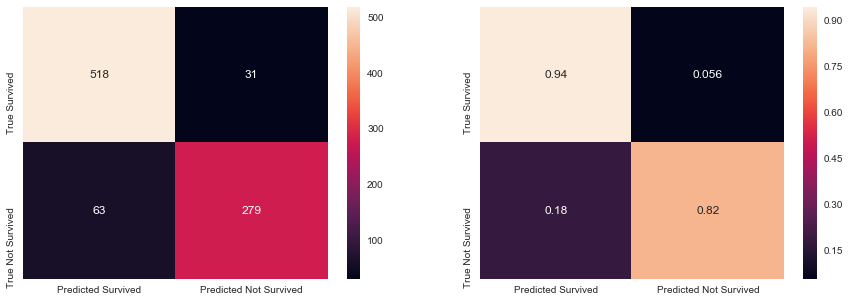

In [81]:
from sklearn.metrics import confusion_matrix
import itertools

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred_random_forest_training_set = clf.predict(X_train)
acc_random_forest = round(clf.score(X_train, y_train) * 100, 2)
print ("Accuracy: %i %% \n"%acc_random_forest)

class_names = ['Survived', 'Not Survived']

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_train, y_pred_random_forest_training_set)
np.set_printoptions(precision=2)

print ('Confusion Matrix in Numbers')
print (cnf_matrix)
print ('')

cnf_matrix_percent = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]

print ('Confusion Matrix in Percentage')
print (cnf_matrix_percent)
print ('')

true_class_names = ['True Survived', 'True Not Survived']
predicted_class_names = ['Predicted Survived', 'Predicted Not Survived']

df_cnf_matrix = pd.DataFrame(cnf_matrix, 
                             index = true_class_names,
                             columns = predicted_class_names)

df_cnf_matrix_percent = pd.DataFrame(cnf_matrix_percent, 
                                     index = true_class_names,
                                     columns = predicted_class_names)

plt.figure(figsize = (15,5))

plt.subplot(121)
sns.heatmap(df_cnf_matrix, annot=True, fmt='d')

plt.subplot(122)
sns.heatmap(df_cnf_matrix_percent, annot=True)

## Comparing Models

Let's compare the accuracy score of all the classifier models used above.

In [82]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 'Linear SVC', 
              'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes', 
              'Perceptron', 'Stochastic Gradient Decent'],
    
    'Score': [acc_log_reg, acc_svc, acc_linear_svc, 
              acc_knn,  acc_decision_tree, acc_random_forest, acc_gnb, 
              acc_perceptron, acc_sgd]
    })

models.sort_values(by='Score', ascending=False)

,Model,Score
4,Decision Tree,89.45
5,Random Forest,89.45
3,KNN,85.41
1,Support Vector Machines,83.50
2,Linear SVC,81.59
7,Perceptron,81.59
0,Logistic Regression,81.26
6,Naive Bayes,79.69
8,Stochastic Gradient Decent,77.22


From the above table, we can see that *Decision Tree* and *Random Forest* classfiers have the highest accuracy score.

Among these two, we choose *Random Forest* classifier as it has the ability to limit overfitting as compared to *Decision Tree* classifier.

## Create Submission File to Kaggle

In [83]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
0,892,3,0,2,0,0,0,2,1,1,1
1,893,3,1,2,1,0,0,0,3,2,0
2,894,2,0,3,0,0,1,2,1,1,1
3,895,3,0,1,0,0,1,0,1,1,1
4,896,3,1,1,1,1,1,0,3,3,0


In [84]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": y_pred_random_forest
    })

submission.to_csv('submission.csv', index=False)